In [2]:
from scipy import linalg
import numpy as np
import matplotlib.cm as cm
from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# == Set up the Gaussian prior density p == #
Sigma = [[0.4, 0.3], [0.3, 0.45]]
Sigma = np.matrix(Sigma)
x_hat = np.matrix([0.2, -0.2]).T

# == Define the matrices G and R from the equation y = G x + N(0, R) == #
G = [[1, 0], [0, 1]]
G = np.matrix(G)
R = 0.5 * Sigma

# == The matrices A and Q == #
A = [[1.2, 0], [0, -0.2]]
A = np.matrix(A)
Q = 0.3 * Sigma

# == The observed value of y == #
y = np.matrix([2.3, -1.9]).T

# == Set up grid for plotting == #
x_grid = np.linspace(-1.5, 2.9, 100)
y_grid = np.linspace(-3.1, 1.7, 100)
X, Y = np.meshgrid(x_grid, y_grid)


def gen_gaussian_plot_vals(mu, C):
    "Z values for plotting the bivariate Gaussian N(mu, C)"
    m_x, m_y = float(mu[0]), float(mu[1])
    s_x, s_y = np.sqrt(C[0, 0]), np.sqrt(C[1, 1])
    s_xy = C[0, 1]
    return bivariate_normal(X, Y, s_x, s_y, m_x, m_y, s_xy)

def prep_ax():
    fig, ax = plt.subplots()
    ax.xaxis.grid(True, zorder=0)
    ax.yaxis.grid(True, zorder=0)
    return ax

def add_y(ax):
    ax.text(float(y[0]), float(y[1]), r"$y$", fontsize=20, color="black")

# == Code for the 4 plots, choose one below == #


def plot1(ax):
    Z = gen_gaussian_plot_vals(x_hat, Sigma)
    ax.contourf(X, Y, Z, 6, alpha=0.6, cmap=cm.jet)
    cs = ax.contour(X, Y, Z, 6, colors="black")
    ax.clabel(cs, inline=1, fontsize=10)


def plot2(ax):
    Z = gen_gaussian_plot_vals(x_hat, Sigma)
    ax.contourf(X, Y, Z, 6, alpha=0.6, cmap=cm.jet)
    cs = ax.contour(X, Y, Z, 6, colors="black")
    ax.clabel(cs, inline=1, fontsize=10)



def plot3(ax):
    Z = gen_gaussian_plot_vals(x_hat, Sigma)
    cs1 = ax.contour(X, Y, Z, 6, colors="black")
    ax.clabel(cs1, inline=1, fontsize=10)
    M = Sigma * G.T * linalg.inv(G * Sigma * G.T + R)
    x_hat_F = x_hat + M * (y - G * x_hat)
    Sigma_F = Sigma - M * G * Sigma
    new_Z = gen_gaussian_plot_vals(x_hat_F, Sigma_F)
    cs2 = ax.contour(X, Y, new_Z, 6, colors="black")
    ax.clabel(cs2, inline=1, fontsize=10)
    ax.contourf(X, Y, new_Z, 6, alpha=0.6, cmap=cm.jet)
    add_y(ax)


def plot4(ax):
    # Density 1
    Z = gen_gaussian_plot_vals(x_hat, Sigma)
    cs1 = ax.contour(X, Y, Z, 6, colors="black")
    ax.clabel(cs1, inline=1, fontsize=10)
    # Density 2
    M = Sigma * G.T * linalg.inv(G * Sigma * G.T + R)
    x_hat_F = x_hat + M * (y - G * x_hat)
    Sigma_F = Sigma - M * G * Sigma
    Z_F = gen_gaussian_plot_vals(x_hat_F, Sigma_F)
    cs2 = ax.contour(X, Y, Z_F, 6, colors="black")
    ax.clabel(cs2, inline=1, fontsize=10)
    # Density 3
    new_x_hat = A * x_hat_F
    new_Sigma = A * Sigma_F * A.T + Q
    new_Z = gen_gaussian_plot_vals(new_x_hat, new_Sigma)
    cs3 = ax.contour(X, Y, new_Z, 6, colors="black")
    ax.clabel(cs3, inline=1, fontsize=10)
    ax.contourf(X, Y, new_Z, 6, alpha=0.6, cmap=cm.jet)
    add_y(ax)


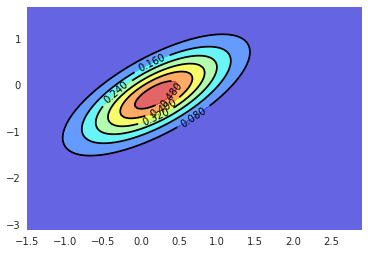

In [9]:
plot1(prep_ax())

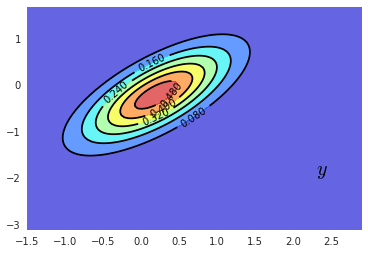

In [11]:
plot2(prep_ax())

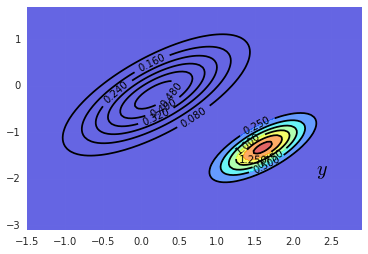

In [12]:
plot3(prep_ax())

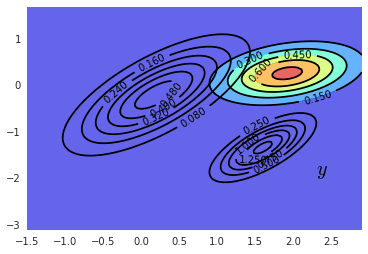

In [15]:
plot4(prep_ax())